# Orel basic analysis

In [12]:
import os
import logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(asctime)s: %(message)s')

import numpy as np
print(f"numpy version {np.__version__}")
import matplotlib
import matplotlib.pyplot as plt
print(f"matplotlib version {matplotlib.__version__}")
import pandas as pd
print(f"pandas version {pd.__version__}")
import scipy.signal as sig
from scipy import __version__ as ver
print(f"scipy version {ver}")

plt.rcParams['figure.figsize'] = [12, 12]
# from pycorrelate import pcorrelate

numpy version 1.16.4
matplotlib version 3.3.1
pandas version 0.24.2
scipy version 1.5.2


### Load binary file

In [13]:
dataDir = "D:\\Users\\Matan\\Downloads\\preprocess files test"
elc = 10
fileList = list(range(0,6))
rangeStr = "-F{0}T{1}".format(fileList[0], fileList[-1])

fpath = os.path.join(dataDir, 'binNew', 'Elec' + str(elc) + rangeStr + '.bin')
elec_data = np.fromfile(fpath,dtype=np.int16)
bl,al = sig.butter(4, 50/(32000/2), btype='lowpass')
lfp_data=sig.filtfilt(bl,al,elec_data)
bb,ab = sig.butter(4, [300/16000, 8000/16000], btype='bandpass')
spk_data=sig.filtfilt(bb,ab,elec_data)


### Plot the neuronal data

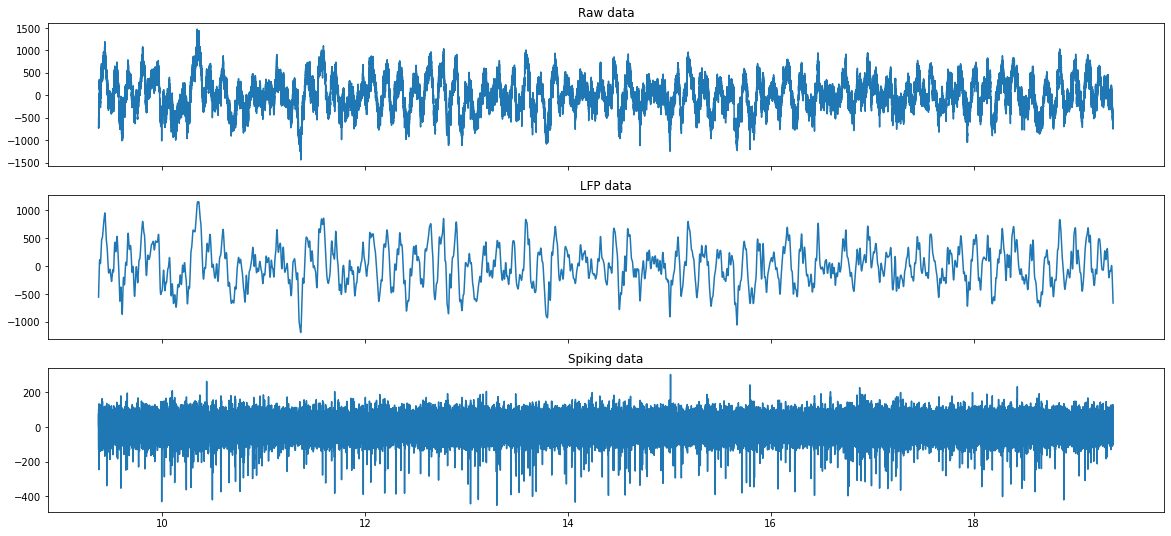

In [14]:
# %matplotlib widget
fig, ax = plt.subplots(figsize=(20,9), nrows=3, ncols=1, sharex=True)

bs = 300000
be = bs+32000*10
t = np.arange(bs, be, 1) / 32000
ax[0].plot(t, elec_data[bs:be])
ax[0].set_title('Raw data')
ax[1].plot(t, lfp_data[bs:be])
ax[1].set_title('LFP data')
ax[2].plot(t, spk_data[bs:be])
ax[2].set_title('Spiking data');

### Calculate covariance between channels

In [15]:
file_list = list(range(2,6))+list(range(7,22))+list(range(23,32))
fileRange = [os.path.join(dataDir, 'binNew', f"Elec{i}{rangeStr}.bin") for i in file_list]
offset = 32000 * 90
count = 32000 * 240

elec_array = np.zeros((len(file_list), count))
for i, f in enumerate(fileRange):
    elec_array[i,:] = np.fromfile(f, dtype=np.int16, count=count)
    
filt_array = sig.filtfilt(bb,ab,elec_array)
lfp_array = sig.filtfilt(bl,al,elec_array)


MemoryError: 

In [ ]:
# Ugly patch
elec_array = elec_array[:,1000:]
filt_array = filt_array[:,1000:]
lfp_array = lfp_array[:,1000:]

In [ ]:
# %matplotlib widget
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10), nrows=2, ncols=2, sharex=True)

b, e = 400, 2000

ax[0,0].plot(elec_array[7,0:32000])
f,p = sig.welch(elec_array[7,:], fs=32000)
r = (f>b) & (f<e)
ax[0,1].plot(f[r],p[r])
ax[0,1].set_xlim([b,e])

ax[1,0].plot(elec_array[23,0:32000])
f,p = sig.welch(elec_array[23,:], fs=32000)
ax[0,1].plot(f[r],p[r])


In [ ]:
# %matplotlib widget
%matplotlib inline
fig, ax = plt.subplots(figsize=(5,5), nrows=1, ncols=1, sharex=True)
ax.plot(lfp_array[5:10, 0:120000].T)


In [ ]:
ccr=np.corrcoef(elec_array)
ccf=np.corrcoef(filt_array)
ccl=np.corrcoef(lfp_array)

In [ ]:
fig, ax = plt.subplots(figsize=(30,30), nrows=1, ncols=3, sharex=True)
cax=ax[0]
csr = cax.imshow(ccr)
cax.set_title(f'Raw correlation matrix')
cax.set_xticks(range(0, len(file_list)))
cax.set_xticklabels(file_list)
cax.set_yticks(range(0, len(file_list)))
cax.set_yticklabels(file_list)
fig.colorbar(csr, ax=ax[0])

cax=ax[1]
csf = cax.imshow(ccf)
cax.set_title(f'Spike correlation matrix')
cax.set_xticks(range(1, len(file_list)))
cax.set_xticklabels(file_list)
cax.set_yticks(range(1, len(file_list)))
cax.set_yticklabels(file_list)
fig.colorbar(csf, ax=ax[1])

cax=ax[2]
csl = cax.imshow(ccl)
cax.set_title(f'Spike correlation matrix')
cax.set_xticks(range(0, len(file_list)))
cax.set_xticklabels(file_list)
cax.set_yticks(range(0, len(file_list)))
cax.set_yticklabels(file_list)
fig.colorbar(csl, ax=ax[2])


In [ ]:
d = (ccf>0.8) & (1-np.eye(len(file_list))).astype(bool)

In [ ]:
e=d.nonzero()
pairs = []
for i in range(0, len(e[0])):
    if (e[0][i]<e[1][i]):
        pairs.append([file_list[e[0][i]], file_list[e[1][i]]])
print(f'Problematic electrodes {pairs}')